In [1]:
# Title and Author Info
# Data-Driven Insights for Cybersecurity Enhancement
# Author: Your Name
# Date: May 2025

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('../Data/cybersecurity_data.csv', header=None)

# View first 5 rows
data.head()


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [2]:
# Assign column names
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "attack", "level"
]

data.columns = columns

# Display the shape and data types
print("Dataset Shape:", data.shape)
data.dtypes


Dataset Shape: (125973, 43)


duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [3]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Check for duplicate rows
print("Duplicate rows:", data.duplicated().sum())

# Remove duplicates
data = data.drop_duplicates()

# Convert categorical variables to category dtype
categorical_cols = ['protocol_type', 'service', 'flag', 'attack']
for col in categorical_cols:
    data[col] = data[col].astype('category')

# Summary of cleaned data
data.info()


Missing Values:
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate             

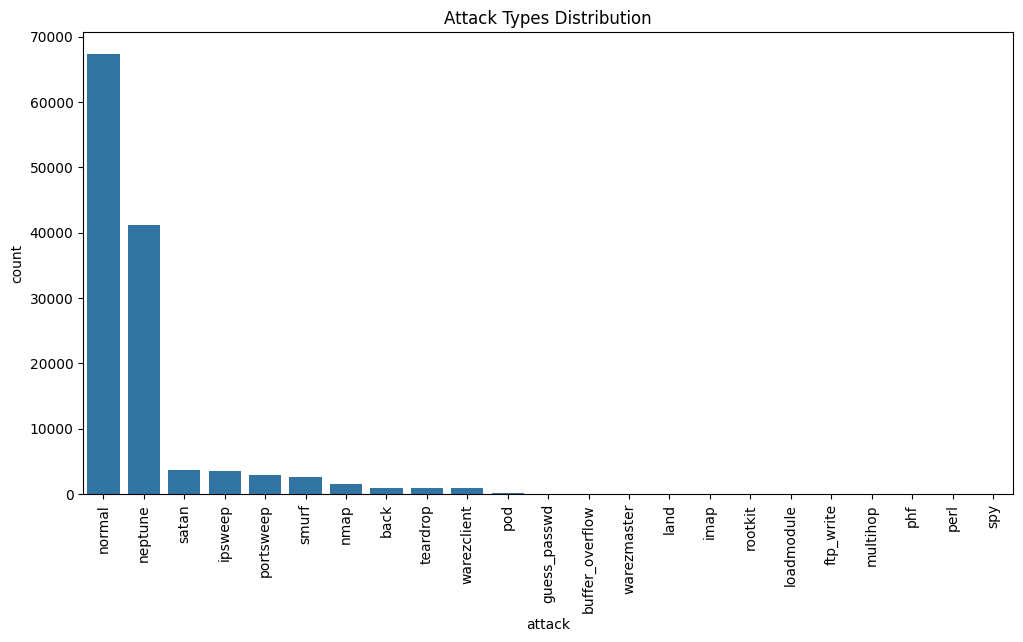

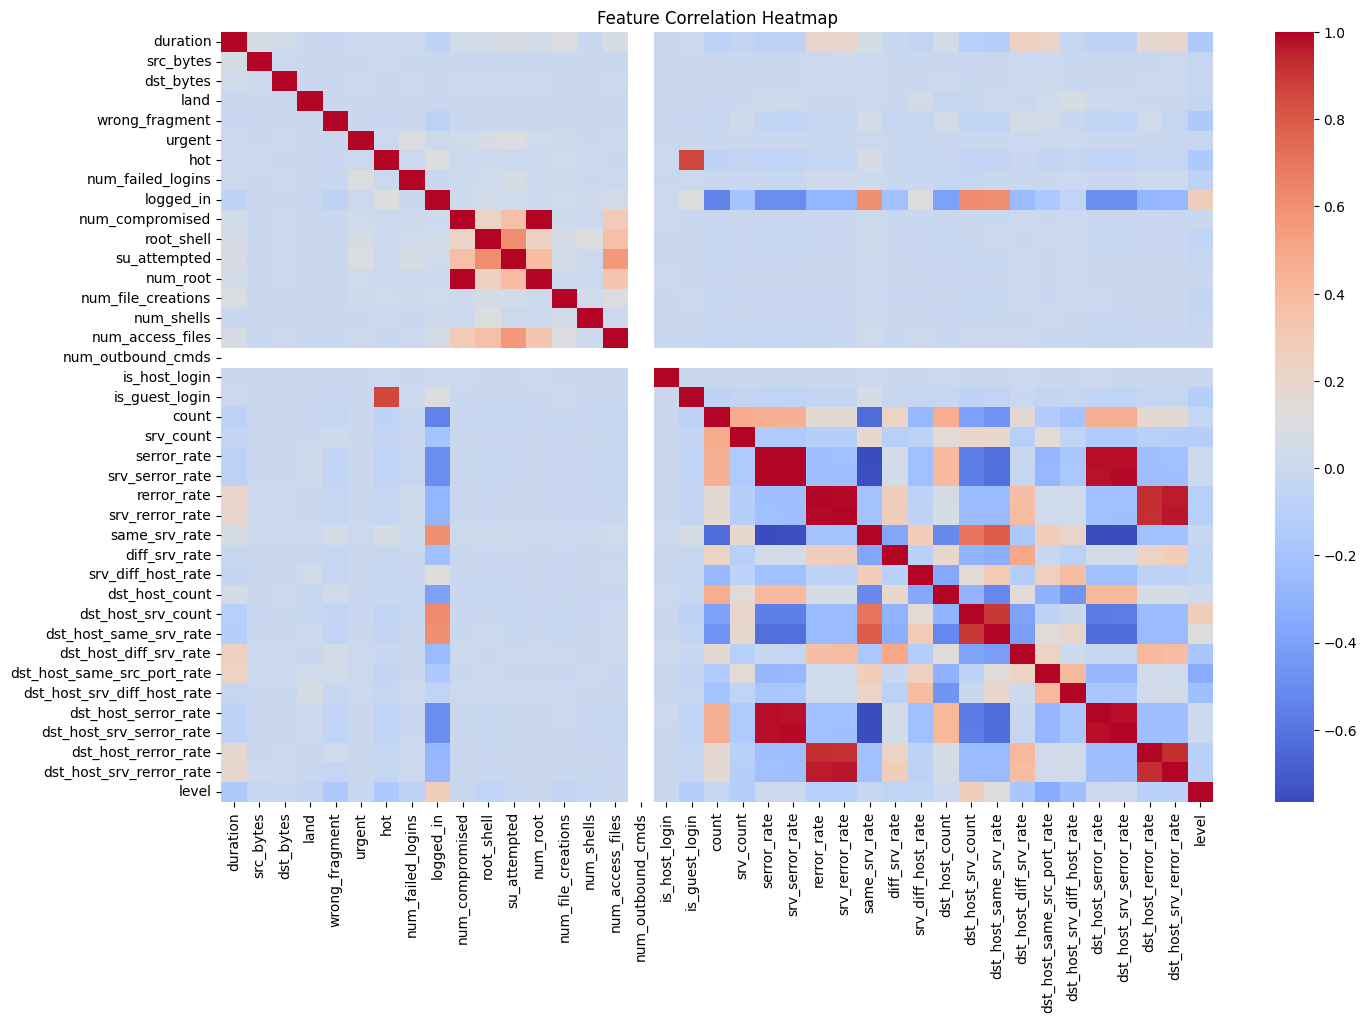

In [4]:
# Plot the distribution of attack types
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='attack', order=data['attack'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Attack Types Distribution")
plt.show()

# Correlation heatmap (for numeric variables)
plt.figure(figsize=(16, 10))
sns.heatmap(data.select_dtypes(include=np.number).corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [5]:
from sklearn.preprocessing import LabelEncoder

# Copy the data for modeling
df = data.copy()

# Encode categorical variables
label_encoders = {}
categorical_cols = ['protocol_type', 'service', 'flag', 'attack']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for inverse transformation

# Example of feature engineering: binary feature for "large source bytes"
df['large_src_bytes'] = (df['src_bytes'] > 5000).astype(int)

# Show the updated dataset
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,large_src_bytes
0,0,1,20,9,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11,20,0
1,0,2,44,9,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11,15,0
2,0,1,49,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,19,0
3,0,1,24,9,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11,21,0
4,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,21,0


In [6]:
from scipy.stats import zscore

# Compute z-scores for numerical features
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))

# Filter out rows where any z-score is above 3 (outliers)
df_no_outliers = df[(z_scores < 3).all(axis=1)]

print("Original data shape:", df.shape)
print("Data shape after removing outliers:", df_no_outliers.shape)


Original data shape: (125973, 44)
Data shape after removing outliers: (0, 44)


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       191
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        11
           4       1.00      1.00      1.00         2
           5       0.87      0.38      0.53       720
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.99      1.00      1.00      8243
          10       0.38      0.68      0.49       299
          11       0.95      1.00      0.98     13469
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        40
          15       0.56      0.98      0.71       586
          16       0.00      0.00      0.00         2
          17       0.99      0.37      0.54       727
    

C:\Users\SIVA TEJA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SIVA TEJA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SIVA TEJA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

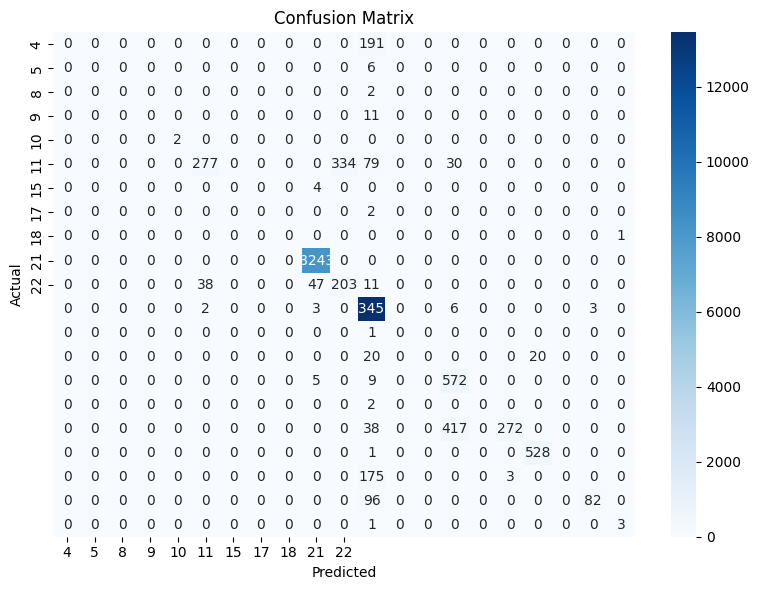

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load your full DataFrame (with no filtering yet) ---
# df = pd.read_csv('your_data.csv')

# --- 2. Define features & target on the full set ---
X_full = df.drop('attack', axis=1)
y_full = df['attack']

# --- 3. Initial train/test split on the raw data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

# --- 4. Outlier removal on TRAINING SET only ---
#    Here’s an example using the 3σ rule; tweak as needed:
mask = (
    np.abs(X_train - X_train.mean()) 
    <= 3 * X_train.std()
).all(axis=1)

X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

# Safety check: make sure we still have data
if X_train_clean.shape[0] == 0:
    raise ValueError(
        "No training samples left after outlier removal. "
        "Try loosening your threshold or using a different method."
    )

# --- 5. Train your model on the cleaned training set ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_clean, y_train_clean)

# --- 6. Evaluate on the untouched test set ---
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=model.classes_,
    yticklabels=model.classes_
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
